In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [193]:
data = np.loadtxt("input", dtype=str)
print(len(data))
print(len(data[0]))

cave_map = np.zeros((len(data)*3+6,len(data[0])*3+6))


#data = np.loadtxt("test", dtype=str)
#print(data)

140
140


In [194]:
from_north = {
    "|": (+1,0),
    "L": (0,+1),
    "J": (0,-1),
    "S": (0,0)
}
from_east = {
    "-": (0,-1),
    "L": (-1,0),
    "F": (1,0),
    "S": (0,0)
}
from_south = {
    "|": (-1,0),
    "7": (0,-1),
    "F": (0,1),
    "S": (0,0)
}
from_west = {
    "-": (0,1),
    "J": (-1,0),
    "7": (1,0),
    "S": (0,0)
}


def find_cords_of_string(data, string):
    position = (0,0)
    position_array = np.char.find(data, string)
    #print(position_array)
    row = np.argmax(position_array)
    position = (row,position_array[row])
    return position
    
def get_char_at_tupel(data, tupel):
    return data[tupel[0]][tupel[1]]

def get_next_options_from_start(data, start):
    pass
        
    
start = find_cords_of_string(data,"S")
print(start)
print(get_char_at_tupel(data,(start)))

res = tuple(np.add(np.array(start),np.array((0,1))))

(96, 101)
S


In [195]:
### for Test 2
patterns = {
        "|": np.array(
            [[0,255,0],
            [0,255,0],
            [0,255,0]]
        ),
        "-": np.array(
            [[0,0,0],
            [255,255,255],
            [0,0,0]]
        ),
        "L": np.array(
            [[0,255,0],
            [0,255,255],
            [0,0,0]]
        ),
        "J": np.array(
            [[0,255,0],
            [255,255,0],
            [0,0,0]]
        ),
        "7": np.array(
            [[0,0,0],
            [255,255,0],
            [0,255,0]]
        ),
        "F": np.array(
            [[0,0,0],
            [0,255,255],
            [0,255,0]]
        ),
        "S": np.array(
            [[0,255,0],
            [255,255,255],
            [0,255,0]]
        ),
    }

def replace_sub_part(data, key,x,y):
    pattern = patterns[key]
    #print(pattern)
    try:
        data[x-2:x+1, y-2:y+1] = pattern
    except:
        print(x,y)
    return data

#zero_array = np.zeros((5,5))
#print(replace_sub_part(zero_array,"F",4,4))

In [196]:
delta = (0,1)
key = ""
counter = 0
new_position = start
#print(new_position)

while key != "S":
    counter +=1
    #print(new_position, end="")
    new_position = tuple(np.add(np.array(new_position),np.array(delta)))
    key = get_char_at_tupel(data, new_position, )
    #cave_map[new_position[0]*3][new_position[1]*3] = 255.0
    #print(key)
    replace_sub_part(cave_map,key,new_position[0]*3+3,new_position[1]*3+3)
    #print("+",delta,"->", new_position)
    #print(key)
    
    
    if delta[0] == 0:
        if delta[1] == 1:
            #print("from west")
            delta = from_west[key]
        else:
            #print("from east")
            delta = from_east[key]
    elif delta[0] != 0:
        if delta[0] == 1:
            #print("from north")
            delta = from_north[key]
        else:
            #print("from south")
            delta = from_south[key]


    if counter >= 100000:
        break
        
print("finished in", counter,"steps")
print("farest poit:", int(counter/2))

finished in 13780 steps
farest poit: 6890


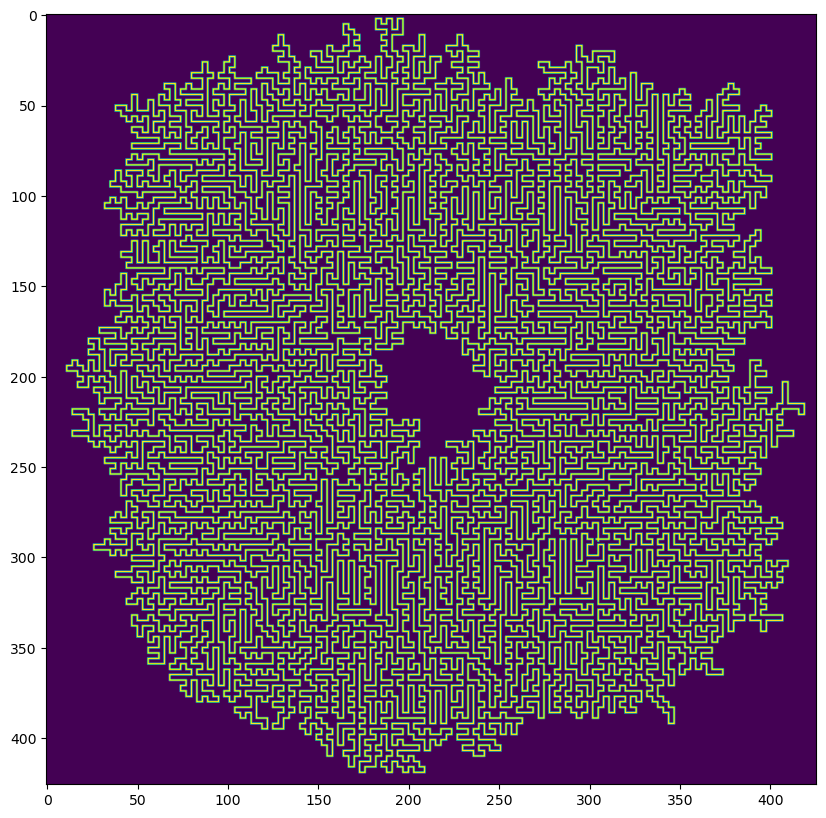

In [197]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.imshow(cave_map)
plt.show()

places: 453


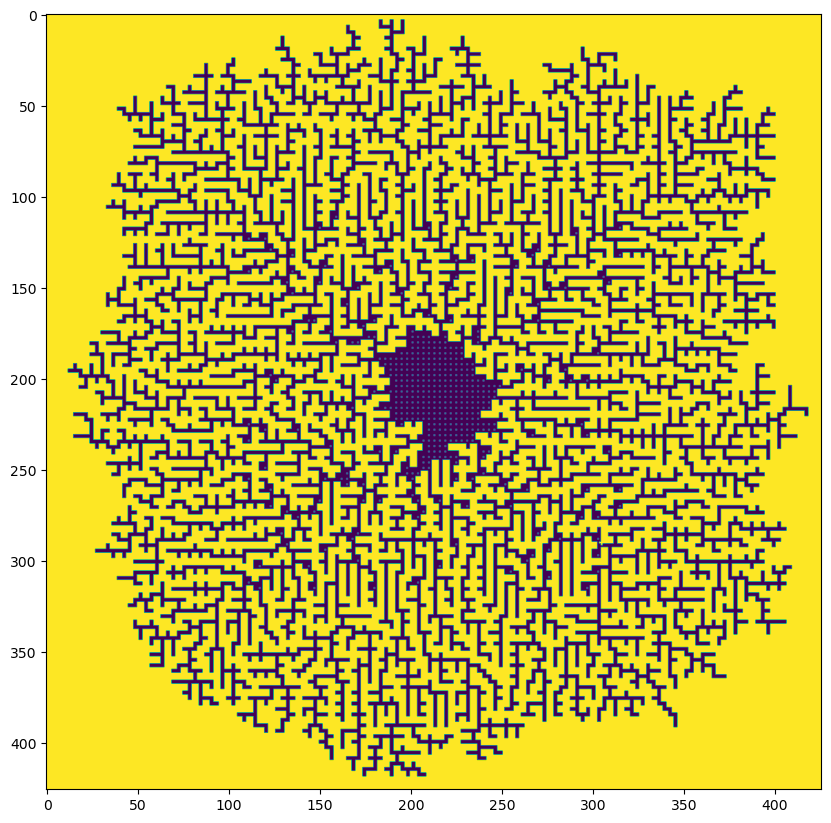

In [201]:
map_copy = cave_map.copy()
length = map_copy.shape[0]
hight = map_copy.shape[1]



def flood_fill(matrix, x,y, target_value, replace_value):
    counter = 0
    fillStack = []
    fillStack.append([x,y])
    
    #x_min, x_max = 0, len(matrix[0])-1
    x_min, x_max = 0, length
    #y_min, y_max = 0, len(matrix[0])-1
    y_min, y_max = 0, hight

    for x,y in fillStack:
        if x < x_min or x >= x_max or y < y_min or y >= y_max:
            continue
        if matrix[x][y] == replace_value:
            continue
        #print((x,y), counter)
        matrix[x][y] = replace_value
        fillStack.append([x-1, y])
        fillStack.append([x+1, y])
        fillStack.append([x, y-1])
        fillStack.append([x, y+1])
        
                
def check_if_is_free(matrix,x,y):
    region = matrix[x-2:x+1, y-2:y+1]
    #region = matrix[x-1:x+1, y-1:y+1]
    if region.shape == (3,3):
        return np.all(region==0)  
    else:
        return False


flood_fill(map_copy,0,0,0,255)


counter_values = 0
counter = 0
for x in range(0,length,3):
    for y in range(0,hight,3):
        counter += 1
        #if counter >= 1000 : break
        if check_if_is_free(map_copy,x,y):
            map_copy[x][y] = 100
            counter_values +=1
print("places:",counter_values)


fig, axes = plt.subplots(1,1,figsize=(10,13))
axes.imshow(map_copy)
plt.show()